In [118]:
import pandas as pd
from sqlalchemy import create_engine

DB_URL   = "sqlite:///db/intraday_panel.db"
DB_TABLE = "intraday_panel"

# build engine
engine = create_engine(DB_URL, future=True)

# --- fetch ONLY last 5 trading days from DB ---
query = f"""
WITH last_days AS (
  SELECT DISTINCT date(date_et) AS d
  FROM "{DB_TABLE}"
  ORDER BY d DESC
  LIMIT 500000
)
SELECT *
FROM "{DB_TABLE}"
WHERE date(date_et) IN (SELECT d FROM last_days)
ORDER BY date_et, ticker
"""

# read just that slice
df = pd.read_sql(query, engine, parse_dates=["date_et"])

# sort by ticker + date and set MultiIndex
df = df.sort_values(["ticker", "date_et"]).set_index(["ticker", "date_et"])

df


intraday_sharpe  winrate_ratio  max_drawdown  \
ticker date_et                                                    
AAPL   2025-07-01         0.213046       1.260870     -0.015189   
       2025-07-02         1.258935       1.036554     -0.013125   
       2025-07-03         0.745422       1.058537     -0.005738   
       2025-07-07        -1.579146       0.964736     -0.031483   
       2025-07-08        -0.048947       1.047244     -0.009439   
...                            ...            ...           ...   
MSFT   2025-09-12         1.183289       1.113821     -0.005132   
       2025-09-15         1.595564       1.222222     -0.005212   
       2025-09-16        -1.560215       0.776765     -0.014636   
       2025-09-17        -0.092227       1.119891     -0.008416   
       2025-09-18        -0.067519       0.974684     -0.009768   

                   slope_open_to_close_pct  hurst_whole_day  \
ticker date_et                                                
AAPL   2025-07-01                 0.003815         0.508532   
       2025-07-02                 0.017314         0.590272   
       2025-07-03                 0.006979         0.543248   
       2025-07-07                -0.022262         0.478385   
       2025-07-08                -0.000594         0.500991   
...                                    ...              ...   
MSFT   2025-09-12                 0.011306         0.432715   
       2025-09-15                 0.015325         0.392133   
       2025-09-16                -0.013201         0.618562   
       2025-09-17                -0.000862         0.595707   
       2025-09-18                -0.000657         0.391581   

                   area_over_under_ratio  max_run_up  avg_vwap_velocity  \
ticker date_et                                                            
AAPL   2025-07-01              26.699461    0.016921       1.344487e-05   
       2025-07-02              31.432294    0.021354       4.348215e-05   
       2025-07-03             432.672291    0.011701       3.165806e-05   
       2025-07-07             356.637186    0.011589      -4.094569e-05   
       2025-07-08               1.811018    0.013406       4.068794e-07   
...                                  ...         ...                ...   
MSFT   2025-09-12           11482.768482    0.016201       2.088496e-05   
       2025-09-15               4.072648    0.014925       3.320236e-05   
       2025-09-16               1.287127    0.006542      -3.780755e-05   
       2025-09-17              38.711916    0.009828      -4.720637e-06   
       2025-09-18               0.021013    0.009762      -7.791258e-06   

                   avg_vwap_acceleration  ta_rsi_last_14  ...  \
ticker date_et                                            ...   
AAPL   2025-07-01          -1.206127e-05       50.592423  ...   
       2025-07-02           2.119875e-07       53.528972  ...   
       2025-07-03          -2.112039e-07       41.569084  ...   
       2025-07-07          -2.295109e-05       60.766995  ...   
       2025-07-08          -1.591593e-06       66.143675  ...   
...                                  ...             ...  ...   
MSFT   2025-09-12           7.766234e-06       29.592062  ...   
       2025-09-15           6.464614e-06       76.776410  ...   
       2025-09-16           7.784272e-07       40.586702  ...   
       2025-09-17           9.679956e-07       53.100380  ...   
       2025-09-18           6.950087e-06       43.589450  ...   

                   z50__avg_vwap_acceleration__FC_LocalSimple_mean1_tauresrat  \
ticker date_et                                                                  
AAPL   2025-07-01                                           0.000000            
       2025-07-02                                           0.000000            
       2025-07-03                                           0.000000            
       2025-07-07                                           0.000000            
       2025-07-08  

In [119]:
df.loc["AAPL"]

,intraday_sharpe,winrate_ratio,max_drawdown,slope_open_to_close_pct,hurst_whole_day,area_over_under_ratio,max_run_up,avg_vwap_velocity,avg_vwap_acceleration,ta_rsi_last_14,...,z50__avg_vwap_acceleration__FC_LocalSimple_mean1_tauresrat,z50__avg_vwap_acceleration__DN_OutlierInclude_p_001_mdrmd,z50__avg_vwap_acceleration__DN_OutlierInclude_n_001_mdrmd,z50__avg_vwap_acceleration__SP_Summaries_welch_rect_area_5_1,z50__avg_vwap_acceleration__SB_BinaryStats_diff_longstretch0,z50__avg_vwap_acceleration__SB_MotifThree_quantile_hh,z50__avg_vwap_acceleration__SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,z50__avg_vwap_acceleration__SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,z50__avg_vwap_acceleration__SP_Summaries_welch_rect_centroid,z50__avg_vwap_acceleration__FC_LocalSimple_mean3_stderr
date_et,,,,,,,,,,,,,,,,,,,,,
2025-07-01,0.213046,1.260870,-0.015189,0.003815,0.508532,2.669946e+01,0.016921,1.344487e-05,-1.206127e-05,50.592423,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-07-02,1.258935,1.036554,-0.013125,0.017314,0.590272,3.143229e+01,0.021354,4.348215e-05,2.119875e-07,53.528972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-07-03,0.745422,1.058537,-0.005738,0.006979,0.543248,4.326723e+02,0.011701,3.165806e-05,-2.112039e-07,41.569084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-07-07,-1.579146,0.964736,-0.031483,-0.022262,0.478385,3.566372e+02,0.011589,-4.094569e-05,-2.295109e-05,60.766995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-07-08,-0.048947,1.047244,-0.009439,-0.000594,0.500991,1.811018e+00,0.013406,4.068794e-07,-1.591593e-06,66.143675,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-07-09,0.426044,1.119891,-0.015396,0.004401,0.478504,3.079662e-03,0.018822,1.931305e-05,-6.594341e-06,76.347200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-07-10,0.636524,1.036554,-0.006773,0.007295,0.421501,3.461519e+01,0.014066,2.077038e-05,1.231369e-06,43.555509,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-07-11,0.202691,0.954887,-0.007497,0.001637,0.559515,3.340960e+00,0.010004,9.251177e-06,-7.039939e-06,44.454435,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-07-14,-0.951305,1.005141,-0.014879,-0.009123,0.614027,9.233632e+00,0.008581,-1.762675e-05,-6.803973e-06,39.084149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [111]:
print(df.iloc[-3].to_string())

intraday_sharpe                                                               -1.560215
winrate_ratio                                                                  0.776765
max_drawdown                                                                  -0.014636
slope_open_to_close_pct                                                       -0.013201
hurst_whole_day                                                                0.618562
area_over_under_ratio                                                          1.287127
max_run_up                                                                     0.006542
avg_vwap_velocity                                                             -0.000038
avg_vwap_acceleration                                                          0.000001
ta_rsi_last_14                                                                40.586702
ta_macd_last                                                                  -0.168424
ta_macd_signal_last             

In [95]:
df.iloc[-1]

intraday_sharpe                                                           -0.339404
winrate_ratio                                                              0.935484
max_drawdown                                                              -0.008819
slope_open_to_close_pct                                                   -0.002725
hurst_whole_day                                                            0.564059
                                                                             ...   
z50__avg_vwap_acceleration__SB_MotifThree_quantile_hh                     -0.480551
z50__avg_vwap_acceleration__SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1    0.953023
z50__avg_vwap_acceleration__SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1        -0.202363
z50__avg_vwap_acceleration__SP_Summaries_welch_rect_centroid              -0.388771
z50__avg_vwap_acceleration__FC_LocalSimple_mean3_stderr                   -0.003312
Name: (MSFT, 2025-08-29 00:00:00), Length: 856, dtype: object

In [4]:
col = "tomo__consec_run_len"
if col not in df.columns:
    raise KeyError(f"Missing column: {col}")

s = pd.to_numeric(df[col], errors="coerce")
max_val = s.max()

if pd.isna(max_val):
    print("All values are NaN—nothing to rank.")
else:
    top_idx = s[s == max_val].index          # supports MultiIndex + ties
    print(f"Max {col}: {max_val}")
    # Print all tied rows (nice in notebooks; use to_string() if plain Python)
    #display(df.loc[top_idx])
    # If you want just one row:
    print(df.loc[top_idx[0]].to_string())


Max tomo__consec_run_len: 3.0
intraday_sharpe                                                                1.005307
winrate_ratio                                                                  1.153846
max_drawdown                                                                  -0.002812
slope_open_to_close_pct                                                        0.004897
hurst_whole_day                                                                0.455843
area_over_under_ratio                                                          0.952698
max_run_up                                                                     0.005756
avg_vwap_velocity                                                              0.000015
avg_vwap_acceleration                                                          0.000017
ta_rsi_last_14                                                                70.023211
ta_macd_last                                                                   0.038436
ta

In [5]:
df.loc[top_idx[0]]

intraday_sharpe                                                            1.005307
winrate_ratio                                                              1.153846
max_drawdown                                                              -0.002812
slope_open_to_close_pct                                                    0.004897
hurst_whole_day                                                            0.455843
                                                                             ...   
z50__avg_vwap_acceleration__SB_MotifThree_quantile_hh                      0.745583
z50__avg_vwap_acceleration__SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1    1.445127
z50__avg_vwap_acceleration__SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1         1.712694
z50__avg_vwap_acceleration__SP_Summaries_welch_rect_centroid               1.188008
z50__avg_vwap_acceleration__FC_LocalSimple_mean3_stderr                   -3.221672
Name: (MSFT, 2016-11-25 00:00:00), Length: 855, dtype: object

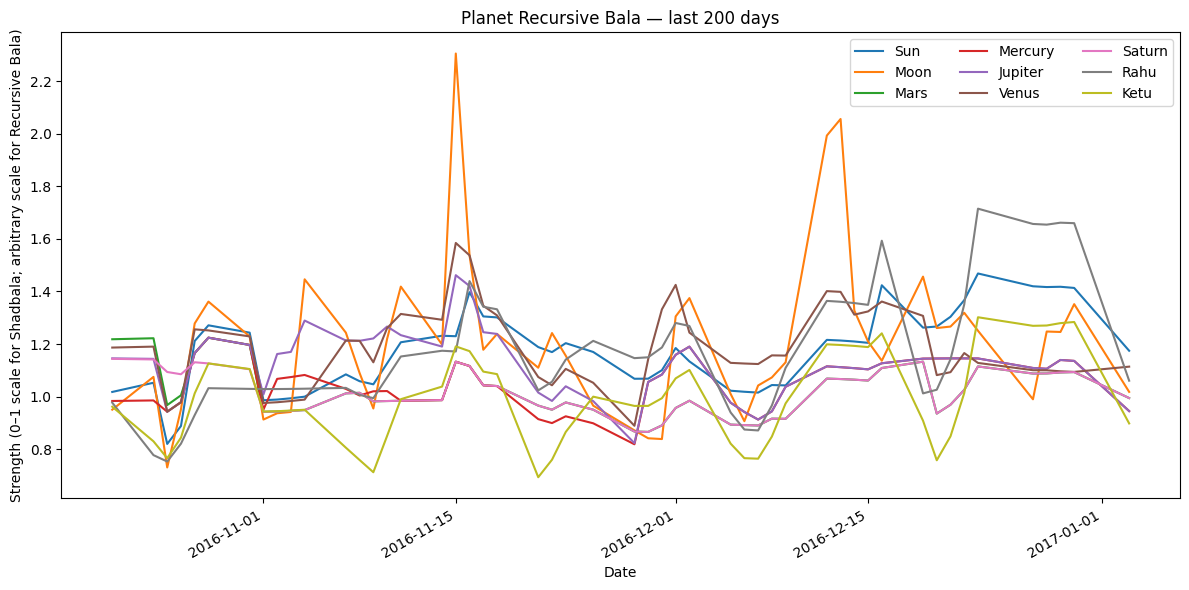

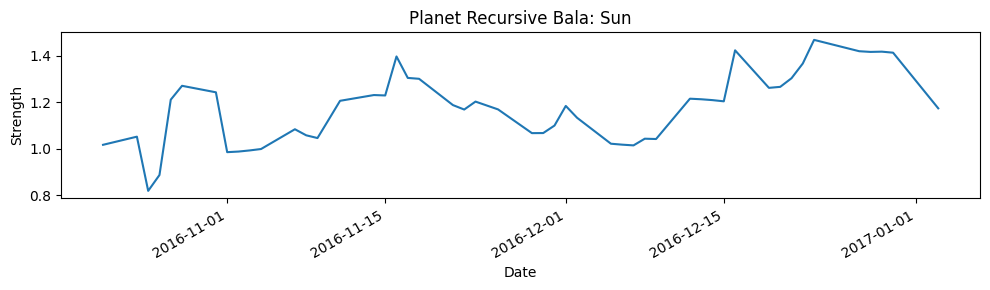

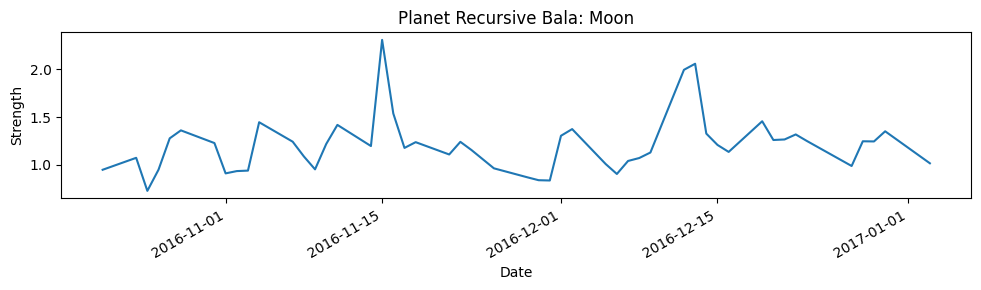

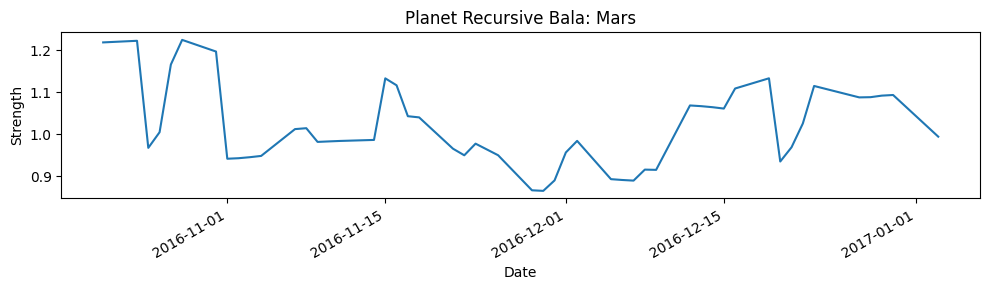

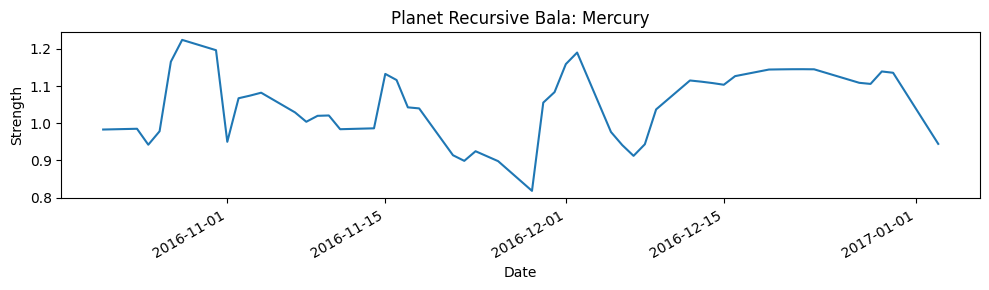

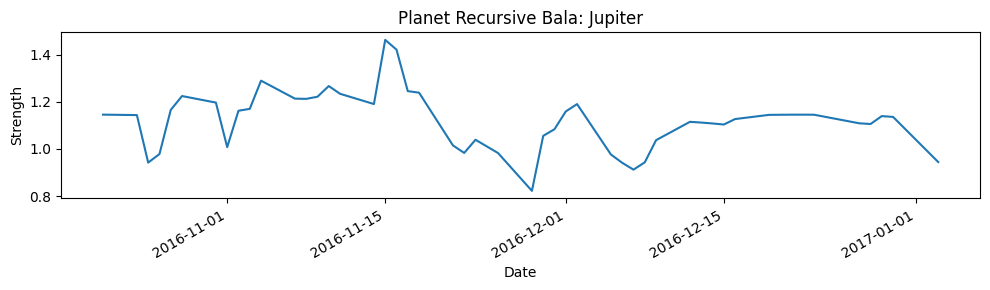

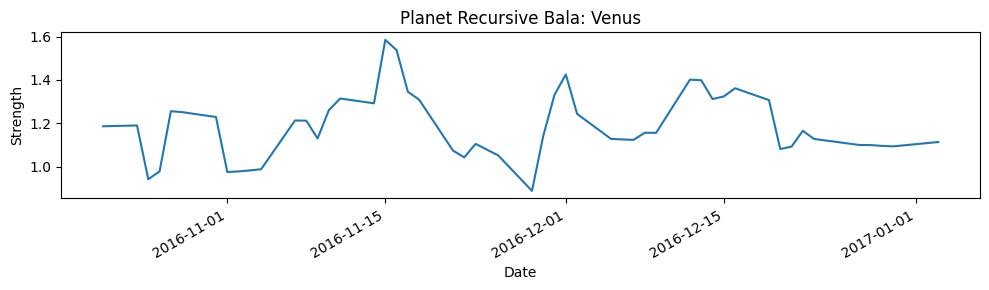

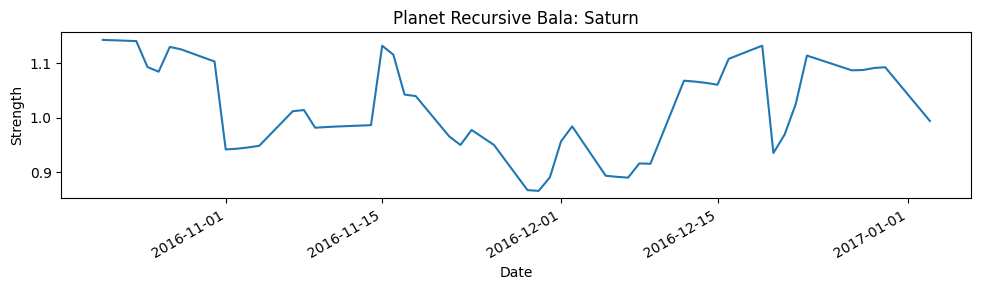

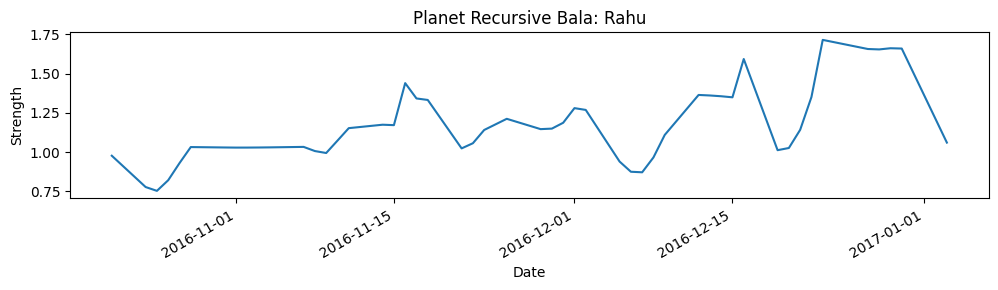

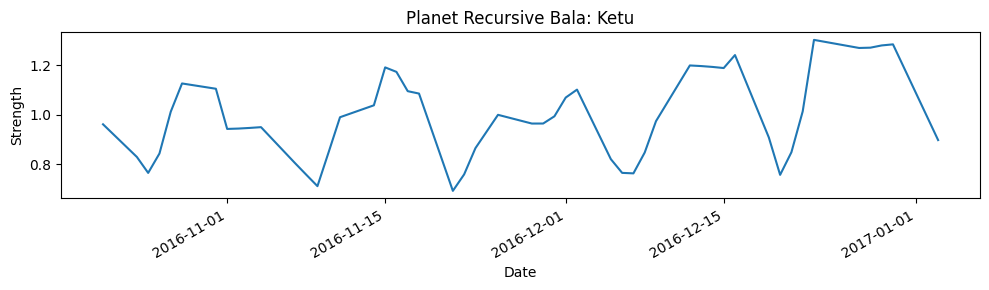

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# planets of interest
PLANETS = ["Sun","Moon","Mars","Mercury","Jupiter","Venus","Saturn","Rahu","Ketu"]

# reset for daily view (astro is per-date, not per-ticker)
tmp = df.reset_index().copy()

# prefer astro aligned to the actual next trading day if present
date_col = "next__date_et" if "next__date_et" in tmp.columns else "date_et"
tmp[date_col] = pd.to_datetime(tmp[date_col])

# choose which columns to plot: try recursive first, else shadbala totals
cols_recursive = [f"astro_recursive_bala__{p}" for p in PLANETS]
cols_shadbala  = [f"shadbala__{p}_total" for p in PLANETS]

if set(cols_recursive).issubset(tmp.columns):
    COLS = cols_recursive
    title_stub = "Planet Recursive Bala"
elif set(cols_shadbala).issubset(tmp.columns):
    COLS = cols_shadbala
    title_stub = "Shadbala Total"
else:
    # take whatever subset exists (don’t whine, just work)
    existing = [c for c in cols_recursive if c in tmp.columns]
    if not existing:
        existing = [c for c in cols_shadbala if c in tmp.columns]
    if not existing:
        raise ValueError("No planet strength columns found (neither planet_recursive_bala__* nor shadbala__*_total).")
    COLS = existing
    title_stub = "Planet Strength (available columns)"

# collapse to one row per day (values identical across tickers for a given date)
daily = (tmp.groupby(date_col, sort=True)[COLS]
           .first()
           .sort_index())

# last 200 days
last_200 = daily.tail(600)

# --- Option A: one overview chart with all nine series ---
ax = last_200.plot(figsize=(12, 6))
ax.set_title(f"{title_stub} — last 200 days")
ax.set_ylabel("Strength (0–1 scale for Shadbala; arbitrary scale for Recursive Bala)")
ax.set_xlabel("Date")
ax.legend([c.split("__")[-1].replace("_total","") for c in COLS], ncol=3)
plt.tight_layout()
plt.show()

# --- Option B: one clean chart per planet (comment out if you only want the overview) ---
for c in COLS:
    plt.figure(figsize=(10, 3))
    last_200[c].plot()
    plt.title(f"{title_stub}: {c.split('__')[-1]}")
    plt.ylabel("Strength")
    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()


In [ ]:
# ========= 60-core day-by-day prequential ensemble WITH TICKER FEATURES, DAILY RANKS,
#            JOINT 30D QUANTILE AUTO-TUNING (portfolio-aware, mutually exclusive),
#            and WATER-FILLING CAPITAL ALLOCATION (cap=2% per name, 50% per side) =========
# Return per row: ret_next = (true__tomo__close - true__tomo__open) / true__tomo__close
# Master composites use WITHIN-DAY Z-SCORES of predicted targets & derived abs-diffs.
# "Multiply highs / divide lows" implemented in LOG domain:
#   score_log = sum(z_high) - sum(z_low); score_raw = exp(score_log); score_*_z = z of score_raw

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

import math
import zlib
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict
from concurrent.futures import ProcessPoolExecutor, as_completed
from sqlalchemy import create_engine, text

pd.options.mode.copy_on_write = True

# ---------- River imports with ARF detection ----------
try:
    import river
    from river import linear_model as linear
    from river import preprocessing, optim, drift, compose, tree, ensemble
    try:
        from river import forest
    except Exception:
        forest = None

    ARF_CLS = None
    if forest is not None:
        for name in ("ARFRegressor", "AdaptiveRandomForestRegressor"):
            if hasattr(forest, name):
                ARF_CLS = getattr(forest, name)
                break

    _missing = []
    req = [
        (linear,        ["LinearRegression", "PARegressor"]),
        (ensemble,      ["BaggingRegressor"]),
        (tree,          ["HoeffdingTreeRegressor", "HoeffdingAdaptiveTreeRegressor"]),
        (preprocessing, ["StandardScaler"]),
        (compose,       ["Pipeline"]),
        (optim,         ["SGD", "Adam"]),
        (drift,         ["ADWIN"]),
    ]
    for mod, names in req:
        for n in names:
            if not hasattr(mod, n):
                _missing.append(f"{mod.__name__}.{n}")
    if _missing:
        raise ImportError("Missing River symbols: " + ", ".join(_missing))
except Exception as e:
    raise RuntimeError(
        "River import failed or is missing required modules/classes.\n"
        "Fix by installing a compatible River build, e.g.:\n"
        "  pip install -U 'river>=0.21'\n"
        f"Original error: {e}"
    ) from e

SKIP_ARF = False
if ARF_CLS is None and not SKIP_ARF:
    raise RuntimeError(
        "Missing Adaptive Random Forest regressor (river.forest.ARFRegressor). "
        "Install River with forest support or set SKIP_ARF=True."
    )

# ------------------------- Config -------------------------
DB_URL         = "sqlite:///intraday_panel.db"
engine         = create_engine(DB_URL, future=True)

start = "2010-01-01"
end   = "2013-01-01"

N_SHARDS     = 60
MAX_WORKERS  = N_SHARDS

PRED_TABLE = "predictions_preq"

TARGET_COLS = [
    "tomo__intraday_sharpe",
    "tomo__winrate_ratio",
    "tomo__max_drawdown",
    "tomo__slope_open_to_close_pct",
    "tomo__hurst_whole_day",
    "tomo__area_over_under_ratio",
    "tomo__open", "tomo__high", "tomo__low", "tomo__close",
    "tomo__volume_pct_diff",
]

HEDGE_ETA        = 0.4
RANDOM_SEED      = 42

N_TICKER_BUCKETS = 2048

Q_GRID_LONG  = [0.70, 0.75, 0.80, 0.85, 0.90, 0.92, 0.94, 0.96, 0.98]
Q_GRID_SHORT = [0.70, 0.75, 0.80, 0.85, 0.90, 0.92, 0.94, 0.96, 0.98]
ROLL_DAYS    = 30
MIN_DAYS_FOR_TUNE = 8
FALLBACK_Q_LONG  = 0.90
FALLBACK_Q_SHORT = 0.90

LONG_BUDGET  = 0.50
SHORT_BUDGET = 0.50
MAX_PER_NAME = 0.02

_WEEKMAP = {d: i for i, d in enumerate(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)}
_MONTHMAP = {m: i for i, m in enumerate(
    ["January","February","March","April","May","June",
     "July","August","September","October","November","December"], start=1
)}

# -------------------- Feature Engineering --------------------
def encode_nextday_calendar_features_inplace(df: pd.DataFrame) -> None:
    nd = pd.to_datetime(df.get("next__date_et"), errors="coerce")
    if "next__weekday" in df.columns:
        wd = df["next__weekday"].map(_WEEKMAP).astype("float32")
        wd = wd.where(~wd.isna(), nd.dt.weekday.astype("float32"))
    else:
        wd = nd.dt.weekday.astype("float32")
    if "next__month" in df.columns:
        mo = (df["next__month"].astype("string").str.strip().str.capitalize()
              .map(_MONTHMAP).astype("float32"))
        mo = mo.where(~mo.isna(), nd.dt.month.astype("float32"))
    else:
        mo = nd.dt.month.astype("float32")
    w_theta = 2 * np.pi * (wd / 7.0)
    m_theta = 2 * np.pi * ((mo - 1.0) / 12.0)
    df["next__wday_sin"]  = np.sin(w_theta).astype("float32")
    df["next__wday_cos"]  = np.cos(w_theta).astype("float32")
    df["next__month_sin"] = np.sin(m_theta).astype("float32")
    df["next__month_cos"] = np.cos(m_theta).astype("float32")
    df["next__is_month_end"]   = nd.dt.is_month_end.fillna(False).astype("int8")
    df["next__is_quarter_end"] = nd.dt.is_quarter_end.fillna(False).astype("int8")
    for c in ("next__weekday", "next__month", "next__date_et"):
        if c in df.columns:
            df.drop(columns=c, inplace=True)

# ------------------ Base / Meta Model Builders ------------------
class EWMARegressor:
    _supervised = True
    def __init__(self, alpha=0.05):
        self.alpha = float(alpha)
        self.mean = None
    def predict_one(self, x):
        return 0.0 if self.mean is None else float(self.mean)
    def learn_one(self, x, y):
        if not (isinstance(y, (int, float)) and math.isfinite(y)):
            return self
        self.mean = float(y) if self.mean is None else (1-self.alpha)*self.mean + self.alpha*float(y)
        return self

class DecaySGDRegressor:
    _supervised = True
    def __init__(self, lr=0.02, l2=1e-3, decay=0.99, clip=5.0):
        self.lr     = float(lr)
        self.l2     = float(l2)
        self.decay  = float(decay)
        self.clip   = float(clip) if clip else None
        self.w      = defaultdict(float)
        self.b      = 0.0
    def predict_one(self, x):
        s = self.b
        for k, v in x.items():
            if v:
                s += self.w[k] * float(v)
        return float(s)
    def learn_one(self, x, y):
        if not (isinstance(y, (int, float)) and math.isfinite(y)):
            return self
        l2_factor = (1.0 - self.l2 * self.lr)
        shrink = self.decay * l2_factor
        if shrink != 1.0:
            for k in list(self.w.keys()):
                self.w[k] *= shrink
            self.b *= self.decay
        yhat = self.predict_one(x)
        err  = float(y) - yhat
        step = self.lr * err
        if self.clip:
            step = max(-self.clip, min(self.clip, step))
        self.b += step
        for k, v in x.items():
            if v:
                self.w[k] += step * float(v)
        return self

class HedgeRegressor:
    _supervised = True
    def __init__(self, base_models: dict, eta: float = 0.5):
        self.base = base_models
        n = len(self.base)
        self.w = {k: 1.0 / n for k in self.base}
        self.eta = float(eta)
    def predict_one(self, x):
        s = 0.0
        for k, m in self.base.items():
            p = m.predict_one(x)
            s += self.w[k] * (0.0 if p is None else float(p))
        return s
    def learn_one(self, x, y):
        preds = {k: m.predict_one(x) for k, m in self.base.items()}
        any_finite = False
        for k, p in preds.items():
            p = 0.0 if p is None else float(p)
            if math.isfinite(p) and math.isfinite(y):
                loss = (p - y) ** 2
                self.w[k] *= math.exp(-self.eta * loss)
                any_finite = True
        if any_finite:
            z = sum(self.w.values())
            if z > 0:
                for k in self.w:
                    self.w[k] /= z
            else:
                n = len(self.w)
                for k in self.w:
                    self.w[k] = 1.0 / n
        for m in self.base.values():
            m.learn_one(x, y)
        return self

def _std(model):
    return compose.Pipeline(preprocessing.StandardScaler(), model)

def make_base_models_strict(random_state=RANDOM_SEED):
    failures = []

    def _try(name, builder):
        try:
            return name, builder()
        except TypeError as te:
            failures.append((name, f"TypeError: {te}"))
            return None
        except Exception as e:
            failures.append((name, repr(e)))
            return None

    candidates = [
        ("lin_sgd_l2_strong",
         lambda: _std(linear.LinearRegression(optimizer=optim.SGD(0.001),  l2=1e-2))),
        ("lin_adam_l2_med",
         lambda: _std(linear.LinearRegression(optimizer=optim.Adam(0.01), l2=1e-3))),
        ("pa_reg",
         lambda: _std(linear.PARegressor(C=0.5, mode=1))),
        ("decay_sgd_tau128",
         lambda: _std(DecaySGDRegressor(lr=0.03, l2=1e-3, decay=math.exp(-1/128)))),
        ("decay_sgd_tau512",
         lambda: _std(DecaySGDRegressor(lr=0.02, l2=5e-4, decay=math.exp(-1/512)))),
    ]

    if ARF_CLS is not None and not SKIP_ARF:
        candidates.append((
            "arf_medium",
            lambda: _std(ARF_CLS(
                n_models=20, max_depth=12, seed=random_state,
                drift_detector=drift.ADWIN(delta=1e-4),
                warning_detector=drift.ADWIN(delta=5e-4)
            ))
        ))
    else:
        failures.append(("arf_medium", "river.forest.ARFRegressor not available and SKIP_ARF is False"))

    candidates += [
        ("bagging_ht",
         lambda: _std(ensemble.BaggingRegressor(
             model=tree.HoeffdingTreeRegressor(
                 grace_period=50, delta=1e-5, tau=1e-5, leaf_prediction='mean'
             ),
             n_models=25, seed=random_state
         ))),
        ("hat",
         lambda: _std(tree.HoeffdingAdaptiveTreeRegressor(
             grace_period=50, delta=1e-5, leaf_prediction='mean'
         ))),
        ("ewma_y", lambda: EWMARegressor(alpha=0.03)),
    ]

    base = {}
    for name, builder in candidates:
        res = _try(name, builder)
        if res is not None:
            k, v = res
            base[k] = v

    if failures:
        msg = ["\nModel construction failed:"]
        msg += [f"  - {name}: {err}" for name, err in failures]
        if any(name == "arf_medium" for name, _ in failures) and not SKIP_ARF:
            msg += [
                "\nFix ARF by installing a River build with forest.ARFRegressor, e.g.:",
                "  pip install -U 'river>=0.21'",
            ]
        raise RuntimeError("\n".join(msg))
    return base

def make_model_zoo_per_target(targets, eta=HEDGE_ETA, seed=RANDOM_SEED):
    zoo = {}
    for t in targets:
        base = make_base_models_strict(random_state=seed)
        zoo[t] = HedgeRegressor(base_models=base, eta=eta)
    return zoo

# ------------------ Ticker Features (hash & TE) ------------------
def shard_id_for_ticker(ticker: str, n_shards: int) -> int:
    return zlib.crc32(ticker.encode("utf-8")) % n_shards

def hashed_ticker_features(ticker: str, n_buckets: int = N_TICKER_BUCKETS):
    b = zlib.crc32(ticker.encode("utf-8")) % n_buckets
    return {f"cat__ticker__{b}": 1.0}

def te_init_state(target_cols):
    return {
        "g_count": {t: 0 for t in target_cols},
        "g_mean":  {t: 0.0 for t in target_cols},
        "by_ticker": {}
    }

def te_get_mean(te_state, ticker, target):
    d = te_state["by_ticker"].get(ticker)
    if d and target in d:
        return d[target][1]
    return te_state["g_mean"][target]

def te_update(te_state, ticker, target, y):
    gc = te_state["g_count"][target] + 1
    gm = te_state["g_mean"][target] + (y - te_state["g_mean"][target]) / gc
    te_state["g_count"][target] = gc
    te_state["g_mean"][target]  = gm
    d = te_state["by_ticker"].setdefault(ticker, {})
    if target in d:
        c, m = d[target]
        c += 1
        m += (y - m) / c
        d[target] = (c, m)
    else:
        d[target] = (1, float(y))

# ------------------ Worker: process shard for one day ------------------
def process_day_shard(args):
    day_str, shard_id, df_shard, feature_cols, target_cols, state_pickle = args
    state = pickle.loads(state_pickle)
    zoo   = state["models"]
    te    = state["te"]

    records = []
    for _, row in df_shard.iterrows():
        ticker = row["ticker"]
        dt     = row["date_et"]
        x = {feat: float(row[feat]) for feat in feature_cols}
        x.update(hashed_ticker_features(ticker, N_TICKER_BUCKETS))
        for t in target_cols:
            x[f"te__{t}__mean_by_ticker"] = float(te_get_mean(te, ticker, t))

        rec = {"ticker": ticker, "date_et": pd.Timestamp(dt).date().isoformat()}

        y_trues = {}
        for t in target_cols:
            y_true = row[t] if t in row and pd.notna(row[t]) else np.nan
            y_trues[t] = y_true
            y_pred = zoo[t].predict_one(x)
            rec[f"pred__{t}"] = float(y_pred) if math.isfinite(y_pred) else np.nan
            rec[f"true__{t}"] = float(y_true) if pd.notna(y_true) else np.nan

        records.append(rec)

        # prequential update
        for t in target_cols:
            y_true = y_trues[t]
            if pd.notna(y_true) and np.isfinite(y_true):
                zoo[t].learn_one(x, float(y_true))
                te_update(te, ticker, t, float(y_true))

    updated_state = {"models": zoo, "te": te}
    updated_pickle = pickle.dumps(updated_state, protocol=pickle.HIGHEST_PROTOCOL)
    return shard_id, records, updated_pickle

# ------------------ Day-level ranks/z-scores ------------------
def add_day_ranks_inplace(df: pd.DataFrame, target_cols):
    for t in target_cols:
        pcol = f"pred__{t}"
        if pcol not in df.columns:
            continue
        p = df[pcol].astype("float64")
        mu = p.mean(skipna=True)
        sd = p.std(skipna=True, ddof=0)
        z = (p - mu) / sd if np.isfinite(sd) and sd > 0 else pd.Series(0.0, index=p.index)
        df[f"zscore__{t}"] = z.astype("float32")
        df[f"rank100__{t}"] = (p.rank(pct=True, ascending=True) * 100.0).astype("float32")

# --- Pred abs-diff z-scores ---
def add_pred_absdiff_zscores_inplace(df: pd.DataFrame):
    for base in ["tomo__high", "tomo__close", "tomo__open", "tomo__low"]:
        c = f"pred__{base}"
        if c not in df.columns:
            df[c] = np.nan
    df["pred__abs_high_close"] = (df["pred__tomo__high"] - df["pred__tomo__close"]).abs()
    df["pred__abs_open_low"]   = (df["pred__tomo__open"] - df["pred__tomo__low"]).abs()
    df["pred__abs_high_open"]  = (df["pred__tomo__high"] - df["pred__tomo__open"]).abs()
    df["pred__abs_close_low"]  = (df["pred__tomo__close"] - df["pred__tomo__low"]).abs()
    for name in ["abs_high_close", "abs_open_low", "abs_high_open", "abs_close_low"]:
        p = df[f"pred__{name}"].astype("float64")
        mu = p.mean(skipna=True)
        sd = p.std(skipna=True, ddof=0)
        z = (p - mu) / sd if np.isfinite(sd) and sd > 0 else pd.Series(0.0, index=p.index)
        df[f"zscore__{name}"] = z.astype("float32")

# --- Composite scores (log-domain) ---
def add_composite_scores_inplace(df: pd.DataFrame):
    long_high = [
        "zscore__tomo__intraday_sharpe",
        "zscore__tomo__winrate_ratio",
        "zscore__tomo__slope_open_to_close_pct",
        "zscore__tomo__hurst_whole_day",
        "zscore__tomo__area_over_under_ratio",
        "zscore__tomo__volume_pct_diff",
    ]
    long_low = [
        "zscore__tomo__max_drawdown",
        "zscore__abs_high_close",
        "zscore__abs_open_low",
    ]
    short_high = [
        "zscore__tomo__hurst_whole_day",
        "zscore__tomo__volume_pct_diff",
        "zscore__tomo__max_drawdown",
    ]
    short_low = [
        "zscore__tomo__intraday_sharpe",
        "zscore__tomo__winrate_ratio",
        "zscore__tomo__slope_open_to_close_pct",
        "zscore__tomo__area_over_under_ratio",
        "zscore__abs_high_open",
        "zscore__abs_close_low",
    ]
    for col in set(long_high + long_low + short_high + short_low):
        if col not in df.columns:
            df[col] = 0.0
    df["score_long_log"]  = df[long_high].sum(axis=1) - df[long_low].sum(axis=1)
    df["score_short_log"] = df[short_high].sum(axis=1) - df[short_low].sum(axis=1)
    df["score_long_raw"]  = np.exp(df["score_long_log"].astype("float64")).astype("float32")
    df["score_short_raw"] = np.exp(df["score_short_log"].astype("float64")).astype("float32")
    for col in ["score_long_raw", "score_short_raw"]:
        p = df[col].astype("float64")
        mu = p.mean(skipna=True); sd = p.std(skipna=True, ddof=0)
        z = (p - mu) / sd if np.isfinite(sd) and sd > 0 else pd.Series(0.0, index=p.index)
        df[f"{col}_z"] = z.astype("float32")
    df["score_long_z"]  = df["score_long_raw_z"]
    df["score_short_z"] = df["score_short_raw_z"]

# --- Return calc ---
def add_true_return_inplace(df: pd.DataFrame):
    oc = "true__tomo__close"; oo = "true__tomo__open"
    for c in [oc, oo]:
        if c not in df.columns:
            df[c] = np.nan
    df["ret_next"] = (df[oc] - df[oo]) / df[oc]

# ---------------- Portfolio utilities ----------------
def _zscore_series(s: pd.Series) -> pd.Series:
    s = s.astype("float64")
    mu = s.mean(skipna=True); sd = s.std(skipna=True, ddof=0)
    if not (np.isfinite(sd) and sd > 0):
        return pd.Series(0.0, index=s.index, dtype="float64")
    return (s - mu) / sd

def waterfill_alloc(strength: pd.Series, total_budget: float, cap: float) -> pd.Series:
    if strength.empty or total_budget <= 0 or cap <= 0:
        return pd.Series(0.0, index=strength.index, dtype="float64")

    s = strength.clip(lower=0).astype("float64")
    idx_all = s.index.tolist()
    active = [i for i in idx_all if s[i] > 0]
    alloc = pd.Series(0.0, index=idx_all, dtype="float64")
    budget = float(total_budget)
    if not active:
        return alloc

    while active and budget > 1e-12:
        s_active = s[active]
        s_sum = s_active.sum()
        if s_sum <= 0:
            per = min(cap, budget / len(active))
            alloc[active] += per
            budget -= per * len(active)
            break
        prop = budget * (s_active / s_sum)
        exceed = prop > cap
        if not exceed.any():
            alloc[active] += prop
            budget = 0.0
            break
        clipped = s_active.index[exceed]
        alloc[clipped] += cap
        budget -= cap * len(clipped)
        active = [i for i in active if i not in set(clipped)]

    if budget > 1e-10 and active:
        room = cap - alloc[active]
        room = room.clip(lower=0)
        total_room = room.sum()
        if total_room > 0:
            extra = np.minimum(room, budget * (room / total_room))
            alloc[active] += extra
    return alloc

def _enforce_mutual_exclusivity_for_day(df_day: pd.DataFrame, thr_long: float, thr_short: float) -> None:
    """Mutually exclusive trade flags: break ties by larger margin over threshold."""
    both = (df_day["score_long_z"] >= thr_long) & (df_day["score_short_z"] >= thr_short)
    if not both.any():
        return
    margin_long  = df_day.loc[both, "score_long_z"]  - thr_long
    margin_short = df_day.loc[both, "score_short_z"] - thr_short
    choose_long = margin_long >= margin_short
    # Assign to the side with larger margin
    df_day.loc[both &  choose_long, "trade_short"] = 0
    df_day.loc[both & ~choose_long, "trade_long"]  = 0

# --------- JOINT portfolio-aware quantile tuning with exclusivity ----------
def _evaluate_quantiles_portfolio_joint(past_df: pd.DataFrame, q_long: float, q_short: float) -> float:
    """Simulate both sides per day with exclusivity, water-filling, and compute avg daily P&L."""
    if "ret_next" not in past_df.columns:
        past_df = past_df.copy()
        past_df["ret_next"] = (past_df["true__tomo__close"] - past_df["true__tomo__open"]) / past_df["true__tomo__close"]

    pnl_days = []
    for d, g in past_df.groupby("date_et"):
        sL = g["score_long_z"].astype("float64")
        sS = g["score_short_z"].astype("float64")
        if sL.notna().sum() == 0 and sS.notna().sum() == 0:
            continue
        thrL = sL.quantile(q_long)  if sL.notna().any() else np.inf
        thrS = sS.quantile(q_short) if sS.notna().any() else np.inf

        # Initial flags
        tL = (sL >= thrL)
        tS = (sS >= thrS)

        # Exclusivity
        both = tL & tS
        if both.any():
            marginL = sL[both] - thrL
            marginS = sS[both] - thrS
            chooseL = marginL >= marginS
            # force disjoint
            tS.loc[both &  chooseL] = False
            tL.loc[both & ~chooseL] = False

        # Re-Z strengths within each selected set
        pnl = 0.0
        if tL.any():
            gL = g.loc[tL]
            strengthL = _zscore_series(gL["score_long_z"]).clip(lower=0)
            if strengthL.sum() == 0 or not np.isfinite(strengthL.sum()):
                strengthL = pd.Series(1.0, index=gL.index, dtype="float64")
            wL = waterfill_alloc(strengthL, LONG_BUDGET, MAX_PER_NAME)
            pnl += float((wL * gL["ret_next"]).sum())

        if tS.any():
            gS = g.loc[tS]
            strengthS = _zscore_series(gS["score_short_z"]).clip(lower=0)
            if strengthS.sum() == 0 or not np.isfinite(strengthS.sum()):
                strengthS = pd.Series(1.0, index=gS.index, dtype="float64")
            wS = waterfill_alloc(strengthS, SHORT_BUDGET, MAX_PER_NAME)
            pnl += float((-wS * gS["ret_next"]).sum())

        pnl_days.append(pnl)

    return float(np.mean(pnl_days)) if pnl_days else -np.inf

def find_optimal_quantiles(con, asof_date: str) -> tuple[float, float]:
    """
    Joint, portfolio-aware, warmup-safe tuner:
    - Pull last ROLL_DAYS of predictions & truths.
    - Grid over (q_long, q_short) with exclusivity + water-filling per day.
    - Maximize average daily portfolio P&L; return (qL, qS).
    """
    d = pd.to_datetime(asof_date)
    d0 = (d - pd.Timedelta(days=ROLL_DAYS)).date().isoformat()
    cols = "date_et, ticker, score_long_z, score_short_z, true__tomo__open, true__tomo__close"
    sql = text(f"""
        SELECT {cols}
        FROM {PRED_TABLE}
        WHERE date_et >= :d0 AND date_et < :d1
        ORDER BY date_et
    """)
    past = pd.read_sql_query(sql, con, params={"d0": d0, "d1": asof_date}, parse_dates=["date_et"])
    if past.empty or past["date_et"].nunique() < MIN_DAYS_FOR_TUNE:
        return (FALLBACK_Q_LONG, FALLBACK_Q_SHORT)

    best = (FALLBACK_Q_LONG, FALLBACK_Q_SHORT, -np.inf)
    for qL in Q_GRID_LONG:
        for qS in Q_GRID_SHORT:
            score = _evaluate_quantiles_portfolio_joint(past, qL, qS)
            if score > best[2]:
                best = (qL, qS, score)
    return (float(best[0]), float(best[1]))

def _table_exists(con, name: str) -> bool:
    chk = con.execute(text("SELECT name FROM sqlite_master WHERE type='table' AND name=:n"), {"n": name}).fetchone()
    return chk is not None

# --- Capital allocation for the *current* day (after exclusivity) ---
def compute_capital_allocation_for_day(df_day: pd.DataFrame) -> pd.Series:
    alloc = pd.Series(0.0, index=df_day.index, dtype="float64")

    mL = df_day.get("trade_long", 0).astype(bool)
    if mL.any():
        zL = _zscore_series(df_day.loc[mL, "score_long_z"]).clip(lower=0)
        if zL.sum() == 0:
            zL = pd.Series(1.0, index=zL.index, dtype="float64")
        wL = waterfill_alloc(zL, LONG_BUDGET, MAX_PER_NAME)
        alloc.loc[mL] = wL.values

    mS = df_day.get("trade_short", 0).astype(bool)
    if mS.any():
        zS = _zscore_series(df_day.loc[mS, "score_short_z"]).clip(lower=0)
        if zS.sum() == 0:
            zS = pd.Series(1.0, index=zS.index, dtype="float64")
        wS = waterfill_alloc(zS, SHORT_BUDGET, MAX_PER_NAME)
        alloc.loc[mS] = alloc.loc[mS] - wS.values

    return alloc.astype("float32")

# ------------------------- SQL Prep -------------------------
with engine.begin() as con:
    cols_df = pd.read_sql_query("PRAGMA table_info(intraday_panel);", con)
    cols = cols_df["name"].tolist()

select_list = ", ".join(["DATE(date_et) AS date_et" if c == "date_et" else c for c in cols])
cols_no_rn  = ", ".join([c for c in cols])

sql_dates = text("""
SELECT DISTINCT DATE(date_et) AS d
FROM intraday_panel
WHERE date_et >= :s AND date_et < :e
ORDER BY d
""")

sql_day = text(f"""
WITH base AS (
  SELECT {select_list}
  FROM intraday_panel
  WHERE date_et >= :d
    AND date_et <  DATE(:d, '+1 day')
    AND ticker   IS NOT NULL
    AND date_et  IS NOT NULL
),
ranked AS (
  SELECT base.*,
         ROW_NUMBER() OVER (
           PARTITION BY ticker, date_et
           ORDER BY next__date_et DESC, volume DESC
         ) AS rn
  FROM base
)
SELECT {cols_no_rn}
FROM ranked
WHERE rn = 1
ORDER BY ticker
""")

# ------------------------- Orchestration -------------------------
initial_models = make_model_zoo_per_target(TARGET_COLS, eta=HEDGE_ETA, seed=RANDOM_SEED)
initial_te     = te_init_state(TARGET_COLS)
initial_state_pickle = pickle.dumps({"models": initial_models, "te": initial_te}, protocol=pickle.HIGHEST_PROTOCOL)
model_state = {shard: initial_state_pickle for shard in range(N_SHARDS)}

first_write  = True
feature_cols = None
n_rows_total = 0

with engine.begin() as con:
    day_list = pd.read_sql_query(sql_dates, con, params={"s": start, "e": end})["d"].tolist()

from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm
executor = ProcessPoolExecutor(max_workers=MAX_WORKERS)

for d in tqdm(day_list):
    with engine.begin() as con:
        df = pd.read_sql_query(
            sql_day, con, params={"d": d},
            parse_dates=["date_et"], index_col=["ticker", "date_et"],
            coerce_float=True
        )
    if df.empty:
        continue

    encode_nextday_calendar_features_inplace(df)
    df.dropna(axis=1, how="all", inplace=True)

    if feature_cols is None:
        non_feature = set(TARGET_COLS)
        feature_cols_local = [c for c in df.columns if c not in non_feature]
        obj_cols = list(df[feature_cols_local].select_dtypes(include=["object"]).columns)
        feature_cols = [c for c in feature_cols_local if c not in obj_cols]

    df_reset = df.reset_index()

    keys   = df_reset[["ticker", "date_et"]].reset_index(drop=True)
    feats  = df_reset[feature_cols].astype("float32").fillna(0.0).reset_index(drop=True)
    ensure_targets = {t: df_reset[t] if t in df_reset.columns else np.nan for t in TARGET_COLS}
    targs = pd.DataFrame(ensure_targets).reset_index(drop=True)

    day_df = pd.concat([keys, feats, targs], axis=1, copy=False).copy()

    tickers_str = day_df["ticker"].astype(str).to_numpy()
    shard_arr = np.fromiter((zlib.crc32(t.encode("utf-8")) % N_SHARDS for t in tickers_str),
                            dtype=np.int32, count=len(tickers_str))
    day_df["__shard"] = shard_arr

    futures = []
    minimal_cols = ["ticker", "date_et"] + feature_cols + TARGET_COLS
    for shard_id, g in day_df.groupby("__shard", sort=True):
        g2 = g[minimal_cols].copy()
        if len(g2) == 0:
            continue
        args = (str(d), int(shard_id), g2, feature_cols, TARGET_COLS, model_state[int(shard_id)])
        futures.append(executor.submit(process_day_shard, args))

    all_records = []
    for fut in as_completed(futures):
        shard_id, records, updated_state_pickle = fut.result()
        all_records.extend(records)
        model_state[int(shard_id)] = updated_state_pickle

    if all_records:
        out_df = pd.DataFrame.from_records(all_records)

        add_day_ranks_inplace(out_df, TARGET_COLS)
        add_pred_absdiff_zscores_inplace(out_df)
        add_composite_scores_inplace(out_df)
        add_true_return_inplace(out_df)

        # ---- JOINT portfolio-aware quantile tuning (warmup-safe + exclusivity) ----
        with engine.begin() as con:
            if first_write or not _table_exists(con, PRED_TABLE):
                q_long, q_short = FALLBACK_Q_LONG, FALLBACK_Q_SHORT
            else:
                q_long, q_short = find_optimal_quantiles(con, str(d))

        # Apply today's thresholds
        thr_long_today  = out_df["score_long_z"].quantile(q_long)  if out_df["score_long_z"].notna().any()  else np.nan
        thr_short_today = out_df["score_short_z"].quantile(q_short) if out_df["score_short_z"].notna().any() else np.nan

        out_df["q_long_opt"]    = float(q_long)
        out_df["q_short_opt"]   = float(q_short)
        out_df["thr_long_day"]  = float(thr_long_today)  if pd.notna(thr_long_today)  else np.nan
        out_df["thr_short_day"] = float(thr_short_today) if pd.notna(thr_short_today) else np.nan

        out_df["trade_long"]  = (out_df["score_long_z"]  >= thr_long_today).astype("int8")  if pd.notna(thr_long_today)  else 0
        out_df["trade_short"] = (out_df["score_short_z"] >= thr_short_today).astype("int8") if pd.notna(thr_short_today) else 0

        # ---- Enforce mutual exclusivity today (same tie-break as tuner) ----
        _enforce_mutual_exclusivity_for_day(out_df, thr_long_today, thr_short_today)

        # ---- Water-filling capital allocation (spend full budgets, clip 2%/name) ----
        out_df["hlreem"] = compute_capital_allocation_for_day(out_df)

        out_df.to_sql(
            PRED_TABLE, engine, if_exists=("replace" if first_write else "append"),
            index=False, method="multi", chunksize=20_000
        )
        first_write = False
        n_rows_total += len(out_df)

executor.shutdown(wait=True)
print(f"Done. Streamed {n_rows_total:,} rows day-by-day across {N_SHARDS} shards with "
      f"ticker features, daily ranks, composites, JOINT portfolio-aware auto-tuned thresholds "
      f"(mutually exclusive), and water-filled capital. Predictions written to '{PRED_TABLE}'.")
